# Processing audio in Python

## The Fourier Transform

The Fourier transform is one of the most important mathematical transformations in signal processing and data analysis

To throw in a quick analogy, the Fourier transform is like a prism:

<img src="http://www.sott.net/image/s7/142773/full/Prism.jpg" width=50%>

We start with a complicated input made up of a combination of a number of simple pieces

The output is the ingredient list for the complicated input, including how much of each is contained within it

In our case, we are going from a complex waveform or sound to a representation of its individual frequency components

In the digital audio analytics world, we are working with discrete sampled audio data, so we will be using the **Discrete** Fourier Transform (DFT):

\begin{equation*}X(k) = \sum_{n=0}^{N-1} x_n e^{-i 2 \pi k \frac{n}{N} }\end{equation*}

**Where:**

$N$ is the total number of samples in our audio file
<br><br>
$x_n$ is the nth sample from our audio signal
<br><br>
$X(k)$ is our DFT output containing the frequency content information for our audio signal
<br><br>

Each element of $X(k)$ is a **complex number** that contains the amplitude and phase information of the individual frequency component of our original waveform

The frequency of the sinusoid being described at each element of $X(k)$ is determined by $\frac{k}{N}$ **multiplied by the signals sample rate**

## Computing the Discrete Fourier Transform

NumPy provides a number of useful functions for performing Fourier Analysis

To understand how to use these and understand and utilize the output they provide, we are going to perform a **Fourier Transform** on a **simple sine wave**

Lets first get our imports in:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import mpld3

/Users/Charlie/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


These calls enable the mpld3 render engine on this notebook and increase the plot size

In [2]:
mpld3.enable_notebook()
pylab.rcParams['figure.figsize'] = 12, 8
pylab.rcParams['font.size'] = 16

This sine wave will be sampled at 44,100Hz, have a duration of 1 second, a frequency of 1000Hz and an amplitude of 1.0

In [3]:
fs = 44100
dur = 1
freq = 1000
A = 1.0

Store a value for the resultant signals total length

In [4]:
sample_len = dur * fs

Preallocate an empty array to store our sine wave

In [5]:
sine_samples = np.zeros(sample_len)

Create an array containing an ascending number of float values between 0 and 1 second with intervals of 1/fs (our sampling interval)

In [6]:
T = np.linspace(0, dur, num=sample_len)

Loop through the empty array, filling it with an oscillating sine wave

In [7]:
for i in range(sample_len):
    sine_samples[i] = A * np.sin(2 * np.pi * freq * T[i])

Plot the first 100 samples, displaying time in milliseconds on the x axis

/Users/Charlie/anaconda/lib/python2.7/site-packages/IPython/core/formatters.py:90: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/Users/Charlie/anaconda/lib/python2.7/site-packages/IPython/core/formatters.py:667: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


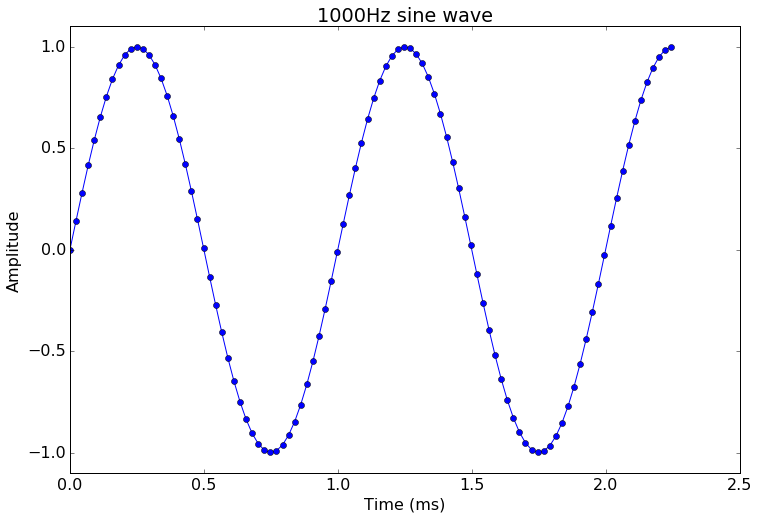

In [8]:
plt.plot(T[0:100]*1000, sine_samples[0:100], marker='o')
plt.ylim([-1.1, 1.1])
plt.title('1000Hz sine wave')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')

Now we are going to convert this waveform into the **frequency domain** using NumPys **rfft** function

In [9]:
dft_output = np.fft.rfft(sine_samples)

If we take a look at one of the elements or **"frequency bins"** of our Fourier transform (FT), we can see that it is a complex number

In [10]:
print dft_output[1]

(7.1123177528e-08-0.000998286095587j)


The value to the left of this complex number is known as the **real** part and the value to the right (multiplied by j) is known as the **imaginary** part

For our module, we dont need to cover the concepts behind complex numbers, but its useful to know the terms used when describing them as they can come up when performing Fourier Analysis

This complex number contains information about this frequency components **amplitude** and position in time or **phase**

For our application we will only be investigating the amplitude of these frequency components so will ignore their phase

The amplitude is encoded as the magnitude of the complex number

The complex number is in the form $z = x + yj$, therefore we can calculate its magnitude $|z| = \sqrt{x^2 + y^2}$

We will now loop through our FT output taking the magnitude of each complex number in each frequency bin, which results in our **magnitude spectrum**

In [11]:
magnitude_spectrum = [np.sqrt(i.real**2 + i.imag**2)/len(dft_output) for i in dft_output]

Note that we are dividing each magnitude value by the number of frequency bins we have, which ensures we are returning to the same amplitude scale used in our original time domain signal (-1 to +1)

Now if we print that same FT value as before we can see that whilst very small, is now a real number, and we are almost ready to visualize this magnitude spectrum

In [12]:
print magnitude_spectrum[1]

4.52716928085e-08


In order to plot our spectrum correctly, we need to setup the frequency values for our x-axis by creating an array of frequency values the same length as our FT output

In [13]:
freqs = np.linspace(0,fs/2, num=len(dft_output))

Now we can plot the magnitude spectrum of our 1000Hz sine wave 

Before we do, lets setup the plot so we can see the spectrum clearly by limiting the range of frequencies we are displaying and labelling the graph appropriately

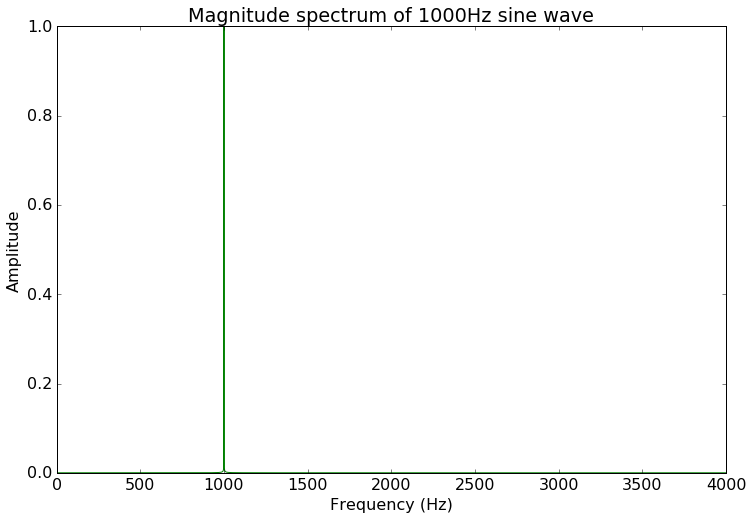

In [14]:
plt.plot(freqs, magnitude_spectrum, 'g')
plt.xlim([0, 4000])
plt.title('Magnitude spectrum of 1000Hz sine wave')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

There we have it, our 1000Hz sine wave transformed to the **frequency domain** using the **Fourier Transform**, or more precisely, its digital counterpart, the **Discrete Fourier Transform**

You can see that the amplitude value of our 1000Hz component is at **1.0**, as it was in the original time domain waveform

As the input signal was a **pure sine wave** at one frequency, the frequency components are displayed as a single peak on the graph

* **Perform a Fourier Transform on a white noise signal and plot it in the same way**

* **Have a go at creating a more complex signal by combining more sine waves of different amplitudes. Try and match the frequency composition of a musical chord**